In [1]:
!pip install Cython

In [2]:
!git clone https://github.com/thtrieu/darkflow.git && cd darkflow

fatal: destination path 'darkflow' already exists and is not an empty directory.


In [3]:
!pip install opencv-python

In [4]:
import cv2
cv2.__version__

'4.1.2'

In [5]:
!pwd

/c/Users/Admin/Desktop/Meter_Reading1


In [6]:
cd darkflow

C:\Users\Admin\Desktop\Meter_Reading1\darkflow


In [7]:
!pip install --upgrade setuptools

  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


In [8]:
!python setup.py build_ext --inplace


running build_ext
building 'darkflow.cython_utils.nms' extension


error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/


In [ ]:
!pip install .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 **Import** **the necessary libraries**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2


**load the configuration file and pre trained weights into variable**

In [0]:
options = {"model": "cfg/yolo.cfg", "load": "/content/darkflow/cfg/yolo.weights", "threshold": 0.1, "gpu": 1.0}

In [47]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading /content/darkflow/cfg/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.013698339462280273s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 

In [48]:
import pprint as pp

original_img = cv2.imread("/content/darkflow/sample_img/sample_horses.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)

pp.pprint(results)

[{'bottomright': {'x': 457, 'y': 257},
  'confidence': 0.12725739,
  'label': 'horse',
  'topleft': {'x': 392, 'y': 208}},
 {'bottomright': {'x': 149, 'y': 339},
  'confidence': 0.49575382,
  'label': 'horse',
  'topleft': {'x': 4, 'y': 176}},
 {'bottomright': {'x': 451, 'y': 316},
  'confidence': 0.36954004,
  'label': 'horse',
  'topleft': {'x': 321, 'y': 200}},
 {'bottomright': {'x': 433, 'y': 370},
  'confidence': 0.7813919,
  'label': 'horse',
  'topleft': {'x': 245, 'y': 197}},
 {'bottomright': {'x': 599, 'y': 350},
  'confidence': 0.8956793,
  'label': 'horse',
  'topleft': {'x': 433, 'y': 210}},
 {'bottomright': {'x': 309, 'y': 410},
  'confidence': 0.8546299,
  'label': 'horse',
  'topleft': {'x': 0, 'y': 193}}]


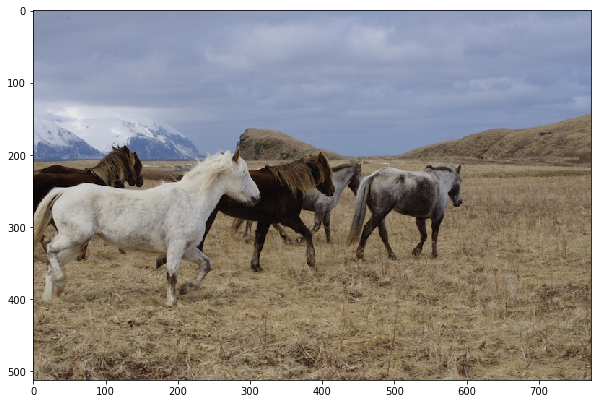

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

In [0]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            print(label)
    return newImage

horse 0.496
horse 0.37
horse 0.781
horse 0.896
horse 0.855


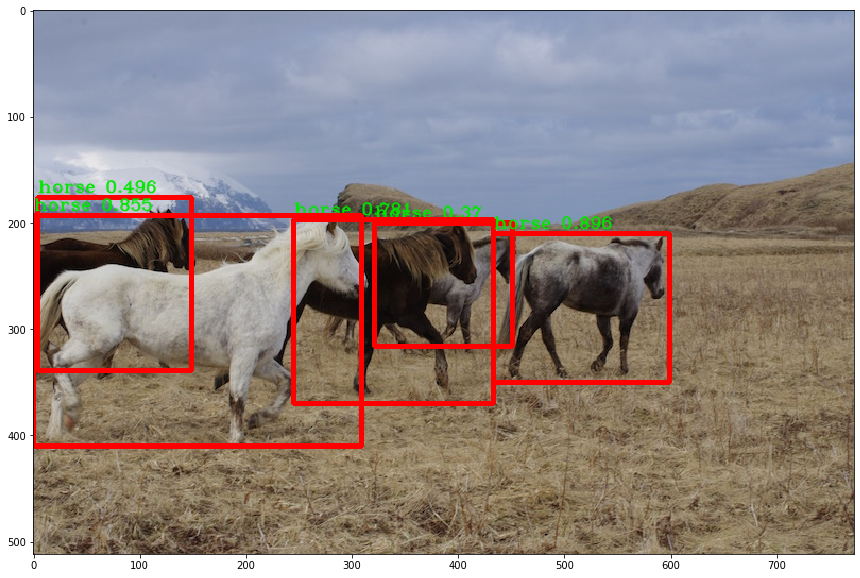

In [51]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [52]:
!ls cfg

coco.names	     tiny-yolo-4c.cfg	v1	  yolo_custom.cfg
extraction.cfg	     tiny-yolo.cfg	v1.1	  yolo-voc.cfg
extraction.conv.cfg  tiny-yolo-voc.cfg	yolo.cfg  yolo.weights


In [53]:

!mkdir ckpt

mkdir: cannot create directory ‘ckpt’: File exists


In [54]:
mv /content/ckpt /content/darkflow

mv: cannot stat '/content/ckpt': No such file or directory


In [55]:
!ls cfg


coco.names	     tiny-yolo-4c.cfg	v1	  yolo_custom.cfg
extraction.cfg	     tiny-yolo.cfg	v1.1	  yolo-voc.cfg
extraction.conv.cfg  tiny-yolo-voc.cfg	yolo.cfg  yolo.weights


In [0]:
# upload config file for Custom Model
# for retrain

options = {"model": "/content/darkflow/cfg/yolo_custom.cfg", 
           "load": "/content/darkflow/cfg/yolo.weights",
           "batch": 16,
           "epoch":100,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/drive/My Drive/annotations",
           "dataset":"/content/drive/My Drive/images"}

**Edit label file and filters**

In [0]:
mv /content/yolo_custom.cfg  /content/darkflow/cfg   

In [0]:
mv /content/labels.txt /content/darkflow

In [0]:
mv /content/loader.py /content/darkflow/darkflow/utils/loader.py

In [58]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing /content/darkflow/cfg/yolo_custom.cfg
Loading /content/darkflow/cfg/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.012563228607177734s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | co

In [1]:
tfnet.train()

NameError: ignored

**Download Checkpoint**

In [0]:
!zip -r /content/ckpt.zip  /content/darkflow/ckpt

	zip warning: name not matched: /content/darkflow/ckpt

zip error: Nothing to do! (try: zip -r /content/ckpt.zip . -i /content/darkflow/ckpt)


**Load Checkpoint**

In [0]:
options = {"model": "cfg/yolo_custom.cfg",
           "load": -1,
           "gpu": 1.0}


In [0]:
tfnet2 = TFNet(options)

Parsing cfg/yolo_custom.cfg
Loading None ...
Finished in 0.00028586387634277344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76

In [0]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_custom-7000
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_custom-7000


**we read in an image and display it**

In [0]:
import pprint as pp

original_img = cv2.imread("/content/drive/My Drive/images/103.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

NameError: ignored

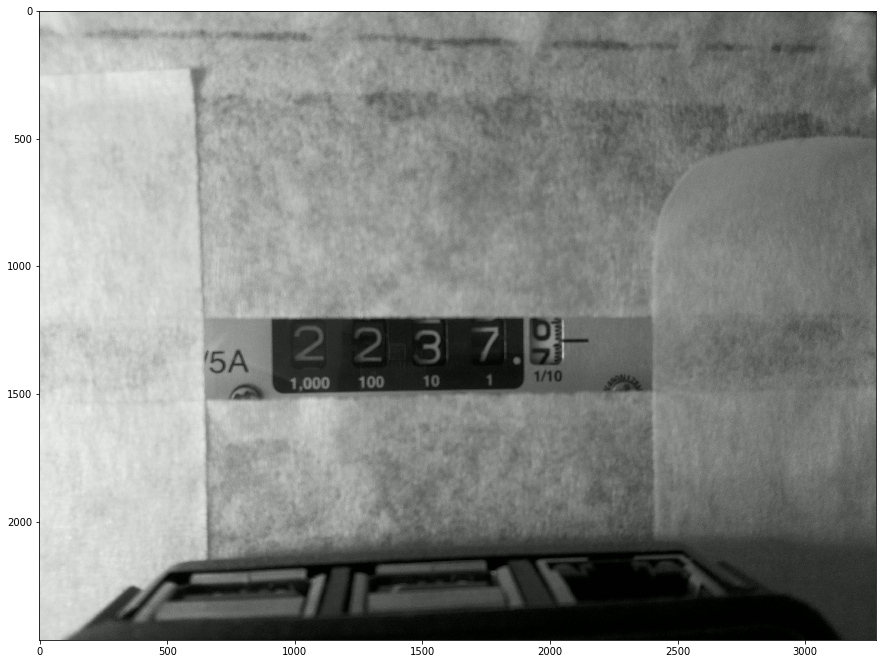

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.1:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            print(label)
    return newImage

2 0.794
2 0.843
3 0.897
7 0.867
7 0.77
7 0.424


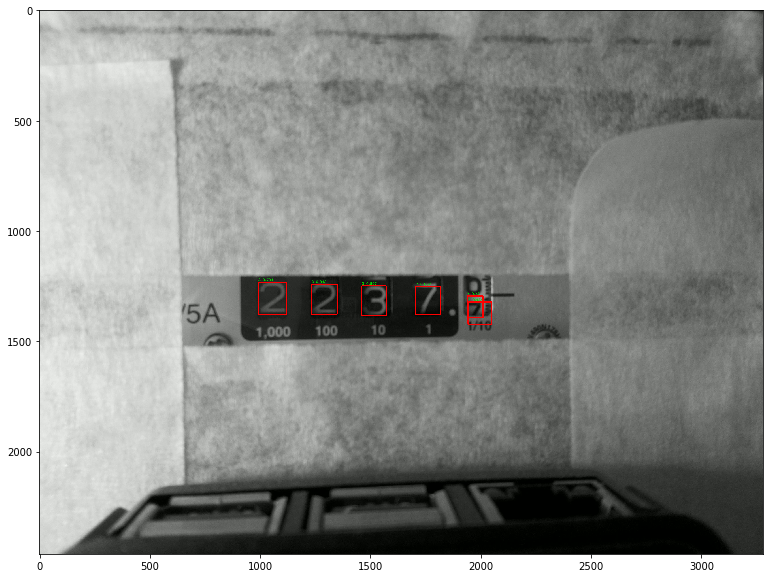

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))